# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
#reading data from dataset
sonar=pd.read_csv("sonar.all-data.csv",names=range(61))

In [3]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## DataExploration/Analysis

In [4]:
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


observation

it is clear that there alot of outliers present in this dataset

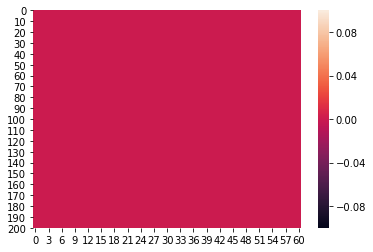

In [5]:
sns.heatmap(sonar.isnull())

it's clear that there is no null data

In [6]:
sonar.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [7]:
sonar[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [8]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

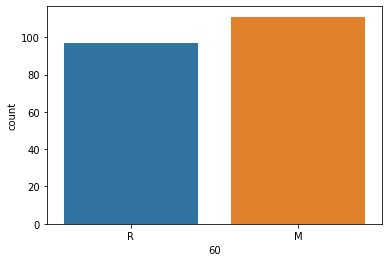

In [9]:
sns.countplot(sonar[60])

In [10]:
sonar.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [11]:
tp={'R':0,'M':1}
sonar[60]=sonar[60].map(tp)

In [12]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

## Identifying and Removing Outliers

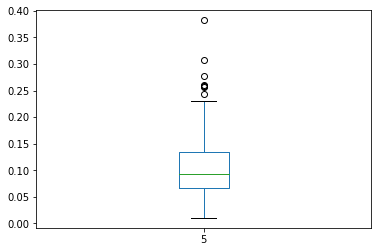

In [13]:
sonar[5].plot.box()

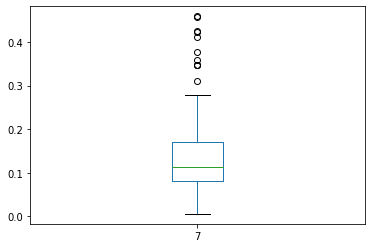

In [14]:
sonar[7].plot.box()

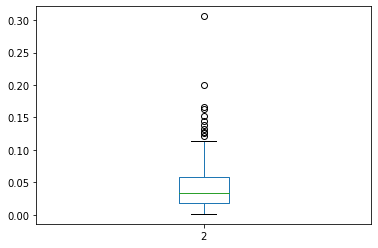

In [15]:
sonar[2].plot.box()

from here you may see that there alot of outliers present in this dataset

In [16]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(sonar))


In [17]:
threshold=3
np.where((z>3))

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
         22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
         85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
        101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
        131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
        135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
        140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
        146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
        147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64),
 array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
        46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
         1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
        53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
         8, 51,  9, 10,  2, 47, 51, 45, 46, 

In [18]:
z[21][47]

0.4557180092574589

In [19]:
z[90][4]

0.5773814647936377

In [20]:
sonar_n=sonar[(z<3).all(axis=1)]

In [21]:
sonar_n.shape

(168, 61)

In [22]:
sonar.shape

(208, 61)

160 rows had been removed as outliers

## Building MachineLearning Model

In [23]:
X=sonar_n.iloc[:,0:-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053


In [24]:
Y=sonar_n.iloc[:,-1]
Y.head()

0    0
1    0
4    0
6    0
7    0
Name: 60, dtype: int64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=15,random_state=43)

In [26]:
X_train.shape

(153, 60)

In [27]:
X_test.shape

(15, 60)

In [28]:
Y_train.shape

(153,)

In [29]:
Y_test.shape

(15,)

## Logistic Regression

In [30]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
accuracy_score(Y_test,predlg)

0.7333333333333333

In [31]:
confusion_matrix(Y_test,predlg)

array([[7, 3],
       [1, 4]], dtype=int64)

In [32]:
print(classification_report(Y_test,predlg))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.72      0.75      0.72        15
weighted avg       0.77      0.73      0.74        15



f1-score is not bad and it's look like model working well

## Gaussian Naive Bayes:

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
predmnb=mnb.predict(X_test)
accuracy_score(Y_test,predmnb)

0.6666666666666666

In [35]:
confusion_matrix(Y_test,predmnb)

array([[6, 4],
       [1, 4]], dtype=int64)

In [36]:
print(classification_report(Y_test,predmnb))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.68      0.70      0.66        15
weighted avg       0.74      0.67      0.68        15



## DecisionTreeClassifier:

In [37]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)
preddct=dtc.predict(X_test)
print('accuracy_score:',accuracy_score(Y_test,preddct))
print('Confusion_matrix:',confusion_matrix(Y_test,preddct))

accuracy_score: 0.7333333333333333
Confusion_matrix: [[7 3]
 [1 4]]


In [38]:
print(classification_report(Y_test,preddct))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.72      0.75      0.72        15
weighted avg       0.77      0.73      0.74        15



f1_score is looks like better compare LogisticRegression

# K Nearet Neighbor Classifier:

In [39]:
#k=10
knc=KNeighborsClassifier()
knc.fit(X_train,Y_train)
knc.score(X_train,Y_train)
predknc=knc.predict(X_test)
print("Accuracy_score:",accuracy_score(Y_test,predknc))
print("Confusion_Matrix:",confusion_matrix(Y_test,predknc))


Accuracy_score: 0.8
Confusion_Matrix: [[7 3]
 [0 5]]


In [40]:
print(classification_report(Y_test,predknc))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.81      0.85      0.80        15
weighted avg       0.88      0.80      0.81        15



# Cross validation

In [41]:
from sklearn.model_selection import cross_val_score

dtcscores=cross_val_score(knc,X,Y,cv=10)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.61111111 0.88888889 0.66666667 0.72222222 0.5625     0.375
 0.9375     0.75       0.625      0.5       ]
0.663888888888889 0.1616191701897999


# Hyperparameter Tuning

In [42]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
knc = KNeighborsClassifier(n_jobs=-1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train, Y_train)
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.520, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.846, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.863, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.865, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.784, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [43]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
grid_predictions=grid.predict(X_test)
grid_predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
cn=confusion_matrix(Y_test,grid_predictions)
cn

array([[9, 1],
       [1, 4]], dtype=int64)

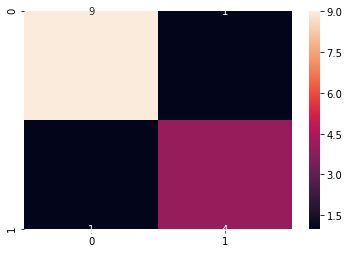

In [46]:
sns.heatmap(cn,annot=True)

# ROC AUC Curve

In [47]:
from sklearn.metrics import roc_curve

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
#KNearestNeighbors Classifier
knc.fit(X_train,Y_train)
y_pred_prob_knc=knc.predict(X_test)

In [50]:
y_pred_prob_knc

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob_knc)

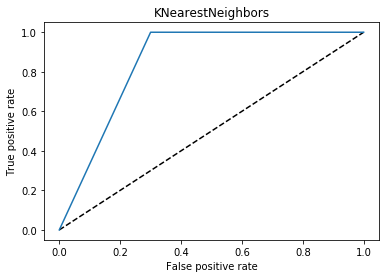

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNearestNeighbors')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNearestNeighbors')
plt.show()

In [53]:
auc_score=roc_auc_score(Y_test,y_pred_prob_knc)
auc_score

0.85

In [54]:
#LogisticRegression
lg.fit(X_train,Y_train)
y_pred_prob_lg=lg.predict(X_test)

In [55]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob_lg)

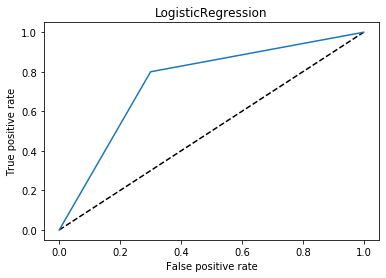

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [57]:
auc_score=roc_auc_score(Y_test,y_pred_prob_lg)
auc_score

0.75

In [58]:
#DecissionTree Classifier
dtc.fit(X_train,Y_train)
y_pred_prob_dtc=dtc.predict(X_test)

In [59]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob_dtc)

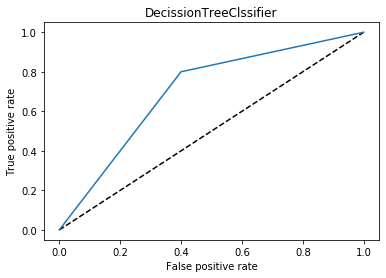

In [60]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecissionTreeClssifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecissionTreeClssifier')
plt.show()

# Saving Model

In [61]:
df1=pd.DataFrame(predknc)
df1.to_csv('knc_prediction.csv')

In [62]:
sonar.shape

(208, 61)

In [63]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(knc,'knc.obj')
#load the model from a file
lg_from_joblib=joblib.load('knc.obj')
#use the loaded model to make prediction
lg_from_joblib.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)